In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

            Date        Close Movement
0     2015-08-03  5679.299805        0
1     2015-08-04  5697.899902        0
2     2015-08-05  5674.000000        0
3     2015-08-06  5610.100098        0
4     2015-08-07  5474.799805        0
...          ...          ...      ...
1263  2020-07-28  6020.500000        0
1264  2020-07-29  6006.399902        0
1265  2020-07-30  6051.100098        0
1266  2020-07-31  5927.799805        0
1267  2020-08-03  5926.100098        0

[1268 rows x 3 columns]


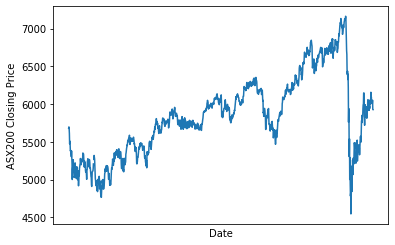

In [25]:
# Data import and preprocessing

data = pd.read_csv('./AXJO-8-Aug-2015-3-Aug-2020.csv')
df = data[['Date', 'Close']]
df.insert(2, 'Movement', '0')

print(df)

plt.plot(df.Date, df.Close)
plt.xlabel('Date')
plt.xticks([])
plt.ylabel('ASX200 Closing Price')
plt.show()

In [ ]:
# Data processing



In [16]:
# Parameter estimation

mean = np.mean(df.Close)
var = np.var(df.Close)
print(mean, var)

5840.650554938389 277318.18097149866


0       5679.299805
1       5697.899902
2       5674.000000
3       5610.100098
4       5474.799805
           ...     
1263    6020.500000
1264    6006.399902
1265    6051.100098
1266    5927.799805
1267    5926.100098
Name: Close, Length: 1268, dtype: float64
